# Analysis of NHANES Body Measurements
This project focuses on analyzing body measurement data from the NHANES dataset using Python. The objective is to gain insights into the distribution of body metrics for males and females and compare them using statistical techniques and visualizations.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore");



## Loading and Previewing Data
The NHANES dataset is loaded and converted into NumPy matrices. We ensure the data is clean and structured for analysis.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving nhanes_adult_male_bmx_2020.csv to nhanes_adult_male_bmx_2020.csv


In [ ]:
from google.colab import files
uploaded=files.upload()


Saving nhanes_adult_female_bmx_2020.csv to nhanes_adult_female_bmx_2020.csv


In [ ]:
male = np.genfromtxt('nhanes_adult_male_bmx_2020.csv', delimiter=',', skip_header=1)
female = np.genfromtxt('nhanes_adult_female_bmx_2020.csv', delimiter=',', skip_header=1)


In [ ]:
print(f"Male data shape: {male.shape}")
print(f"Female data shape: {female.shape}")

Male data shape: (4082, 7)
Female data shape: (4222, 7)


In [ ]:
print("Male Data Preview:")
print(male[:5])

print("\nFemale Data Preview:")
print(female[:5])

Male Data Preview:
[[  nan   nan   nan   nan   nan   nan   nan]
 [ 98.8 182.3  42.   40.1  38.2 108.2 120.4]
 [ 74.3 184.2  41.1  41.   30.2  94.5  86.8]
 [103.7 185.3  47.   44.   32.  107.8 109.6]
 [ 86.  167.8  39.5  38.4  29.  106.4 108.3]]

Female Data Preview:
[[  nan   nan   nan   nan   nan   nan   nan]
 [ 97.1 160.2  34.7  40.8  35.8 126.1 117.9]
 [ 91.1 152.7  33.5  33.   38.5 125.5 103.1]
 [ 73.  161.2  37.4  38.   31.8 106.2  92. ]
 [ 61.7 157.4  38.   34.7  29.  101.   90.5]]


## Weight Distributions
Below are histograms comparing the weight distributions of males and females. This helps visualize the central tendency and spread of weights.


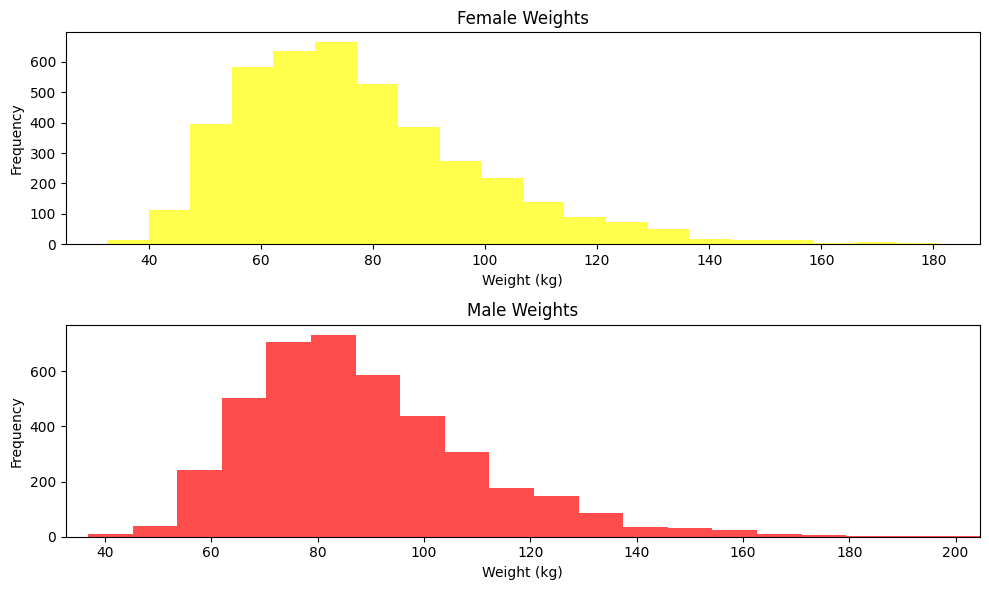

In [ ]:

# Remove NaN values from male_weights and female_weights before calculating limits
male_weights_no_nan = male_weights[np.isfinite(male_weights)]
female_weights_no_nan = female_weights[np.isfinite(female_weights)]

plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.hist(female_weights_no_nan, bins=20, color='yellow', alpha=0.7)
plt.title('Female Weights')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')

plt.subplot(2, 1, 2)
plt.hist(male_weights_no_nan, bins=20, color='red', alpha=0.7)
plt.title('Male Weights')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')

plt.xlim(min(male_weights_no_nan.min(), female_weights_no_nan.min()),
         max(male_weights_no_nan.max(), female_weights_no_nan.max()))

plt.tight_layout()
plt.show()

This code  takes data on male and female weights, cleans it by removing missing values, and then generates two histograms to visually compare their distributions

## Boxplots for Male and Female Weights
The boxplots below compare the weights of males and females, showing the median, interquartile range, and potential outliers.


If weights include invalid values, the boxplot may fail to render,in that case we filter out invalid values

In [ ]:
male_weights = male_weights[~np.isnan(male_weights) & ~np.isinf(male_weights)]
female_weights = female_weights[~np.isnan(female_weights) & ~np.isinf(female_weights)]


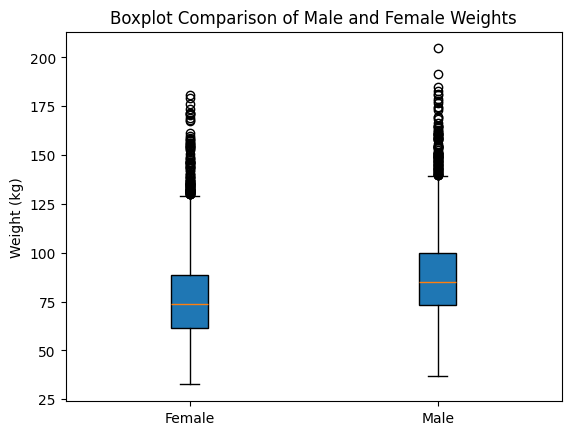

In [ ]:
plt.boxplot([female_weights, male_weights], labels=["Female", "Male"], patch_artist=True)
plt.title("Boxplot Comparison of Male and Female Weights")
plt.ylabel("Weight (kg)")
plt.show()


This code  generates a boxplot to visually compare the distributions of male and female weights. By examining the boxplot, one can quickly identify the median, quartiles, and potential outliers in the weight data

## Statistical Measures
Basic statistics (mean, median, standard deviation, skewness) are calculated for male and female weights.


In [ ]:
from scipy.stats import skew, kurtosis
def calculate_statistics(data):
    return {
        'Mean': np.mean(data),
        'Median': np.median(data),
        'Std Dev': np.std(data),
        'Skewness': skew(data),

    }

male_stats = calculate_statistics(male_weights)
female_stats = calculate_statistics(female_weights)

print("Male Weight Statistics:", male_stats)
print("Female Weight Statistics:", female_stats)
stats_df = pd.DataFrame({
    'Statistic': ['Mean', 'Median', 'Standard Deviation', 'Skewness'],
    'Male': list(male_stats.values()),
    'Female': list(female_stats.values())
})
display(stats_df)


Male Weight Statistics: {'Mean': 88.36454300416565, 'Median': 85.0, 'Std Dev': 21.418936717962495, 'Skewness': 0.9842810741662347}
Female Weight Statistics: {'Mean': 77.40379057095475, 'Median': 73.6, 'Std Dev': 21.54250829019315, 'Skewness': 1.03336107186799}


,Statistic,Male,Female
0,Mean,88.364543,77.403791
1,Median,85.000000,73.600000
2,Standard Deviation,21.418937,21.542508
3,Skewness,0.984281,1.033361


Comparison of Male and Female Values by Statistic

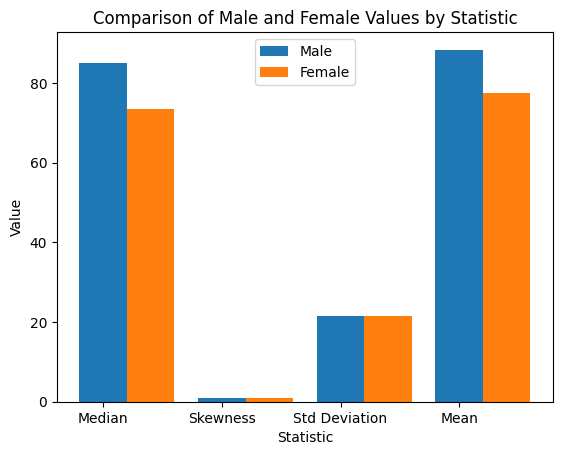

In [ ]:


import matplotlib.pyplot as plt

statistics = ['Median', 'Skewness','Std Deviation', 'Mean']
male_values = [85.0, 0.9842810741662347,21.418937, 88.36454300416565]
female_values = [73.6, 1.03336107186799,21.542508, 77.40379057095475]

x = range(len(statistics))

plt.bar(x, male_values, width=0.4, label='Male')
plt.bar([i + 0.4 for i in x], female_values, width=0.4, label='Female')

plt.xlabel('Statistic')
plt.ylabel('Value')
plt.title('Comparison of Male and Female Values by Statistic')
plt.xticks(x, statistics)
_ = plt.legend()

Mean/Median:

 Comparing the mean and median weights for males and females would provide insights into the typical weight for each group. If the mean is significantly higher than the median, it could suggest a skewed distribution with some heavier individuals pulling the average up.


Standard Deviation: This measure tells us how spread out the weights are within each group. A higher standard deviation means more variability in weights.


Skewness: Skewness indicates the asymmetry of the distribution. A positive skew would mean there's a tail towards higher weights, while a negative skew would indicate a tail towards lower weights.

#Add BMI column to the female matrix
BMI = weight (kg) / (height (m))²
Add the BMI as the 8th column.

In [ ]:
# Replace NaNs in height with the column mean
mean_height = np.nanmean(female[:, 1])
female[:, 1] = np.where(np.isnan(female[:, 1]) | (female[:, 1] == 0), mean_height, female[:, 1])

# Replace NaNs in weight with the column mean
mean_weight = np.nanmean(female[:, 0])
female[:, 0] = np.where(np.isnan(female[:, 0]), mean_weight, female[:, 0])


height_in_meters = female[:, 1] / 100
female_bmi = female[:, 0] / (height_in_meters ** 2)

# Add BMI as a new column to the female matrix
female = np.column_stack((female, female_bmi))
print("Female data with BMI:", female[:5])

Female data with BMI: [[ 77.40379057 160.13679223  36.0310353   37.15797204  32.71032931
  109.17837005  98.48810708  30.10337881  30.10337881  30.18422154
   30.18422154  30.18422154]
 [ 97.1        160.2         34.7         40.8         35.8
  126.1        117.9         37.83504078  37.83504078  37.83504078
   37.83504078  37.83504078]
 [ 91.1        152.7         33.5         33.          38.5
  125.5        103.1         39.06972037  39.06972037  39.06972037
   39.06972037  39.06972037]
 [ 73.         161.2         37.4         38.          31.8
  106.2         92.          28.09265496  28.09265496  28.09265496
   28.09265496  28.09265496]
 [ 61.7        157.4         38.          34.7         29.
  101.          90.5         24.90437849  24.90437849  24.90437849
   24.90437849  24.90437849]]


#Standardize the female matrix

In [ ]:



zfemale = (female - female.mean(axis=0)) / female.std(axis=0)
print("Standardized Female Data:", zfemale[:5])



Standardized Female Data: [[-5.93769490e-15 -1.20751861e-14  7.27023642e-14  1.32640131e-14
   0.00000000e+00  5.45850782e-15 -6.53542913e-15  9.16325713e-16
   9.16325713e-16  1.04231206e-02  1.04231206e-02  1.04231206e-02]
 [ 9.14403381e-01  8.95143896e-03 -5.67461840e-01  1.13312224e+00
   5.50910710e-01  1.08328987e+00  1.11591678e+00  9.97085793e-01
   9.97085793e-01  9.97083310e-01  9.97083310e-01  9.97083310e-01]
 [ 6.35851292e-01 -1.05319316e+00 -1.07905925e+00 -1.29364482e+00
   1.03234031e+00  1.04487903e+00  2.65120395e-01  1.15631177e+00
   1.15631177e+00  1.15630929e+00  1.15630929e+00  1.15630929e+00]
 [-2.04447511e-01  1.50570719e-01  5.83632326e-01  2.61975090e-01
  -1.62318323e-01 -1.90669463e-01 -3.72976898e-01 -2.59305721e-01
  -2.59305721e-01 -2.59308187e-01 -2.59308187e-01 -2.59308187e-01]
 [-7.29053945e-01 -3.87582544e-01  8.39431029e-01 -7.64734049e-01
  -6.61578646e-01 -5.23563358e-01 -4.59206261e-01 -6.70470253e-01
  -6.70470253e-01 -6.70472714e-01 -6.70472714e

## Scatterplot Matrix
Pairwise relationships between standardized variables (weight, height, waist circumference, hip circumference, and BMI) are visualized to understand correlations.


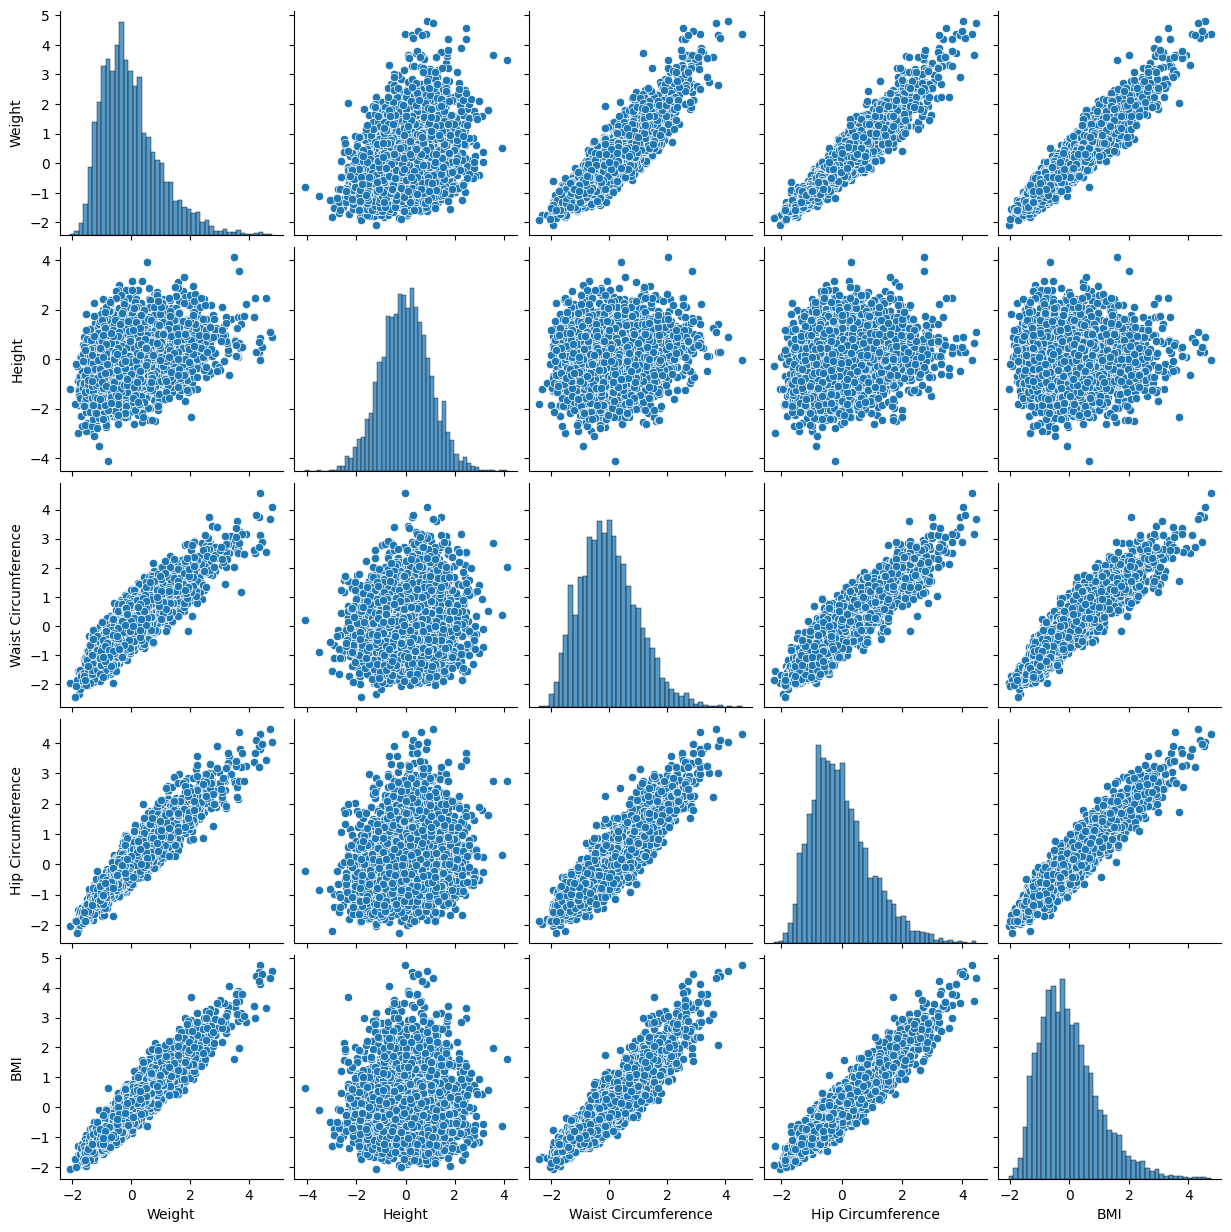

In [ ]:
zfemale_df = pd.DataFrame(zfemale, columns=["Weight", "Height", "Arm Length", "Leg Length",
                                            "Arm Circumference", "Hip Circumference",
                                            "Waist Circumference", "BMI","Unnamed_9","Unnamed_10","Unnamed_11","Unnamed_12"])


selected_columns = zfemale_df[["Weight", "Height", "Waist Circumference",
                               "Hip Circumference", "BMI"]]
sns.pairplot(selected_columns)
plt.show()


By carefully examining the patterns in the scatterplot matrix, you can gain valuable insights into the relationships between different body measurements for females in the NHANES dataset, potentially identifying trends and areas for further investigation

## Waist-to-Height and Waist-to-Hip Ratios
The boxplots below compare the waist-to-height and waist-to-hip ratios across genders. These ratios are useful for understanding health metrics beyond BMI.


In [ ]:
# Waist-to-Height Ratio (Female)
female_waist_to_height = female[:, 6] / female[:, 1]

# Waist-to-Hip Ratio (Female)
female_waist_to_hip = female[:, 6] / female[:, 5]

# Add these ratios as new columns to the female matrix
female = np.column_stack((female, female_waist_to_height, female_waist_to_hip))

# Waist-to-Height Ratio (Male)
male_waist_to_height = male[:, 6] / male[:, 1]

# Waist-to-Hip Ratio (Male)
male_waist_to_hip = male[:, 6] / male[:, 5]

# Add these ratios as new columns to the male matrix
male = np.column_stack((male, male_waist_to_height, male_waist_to_hip))


In [ ]:

print("Updated Female Matrix (with Ratios):")
print(female[:5])

print("\nUpdated Male Matrix (with Ratios):")
print(male[:5])


Updated Female Matrix (with Ratios):
[[ 77.40379057 160.13679223  36.0310353   37.15797204  32.71032931
  109.17837005  98.48810708  30.10337881  30.10337881  30.18422154
   30.18422154  30.18422154   0.61502485   0.90208442   0.61502485
    0.90208442   0.61502485   0.90208442   0.61502485   0.90208442
    0.61502485   0.90208442   0.61502485   0.90208442]
 [ 97.1        160.2         34.7         40.8         35.8
  126.1        117.9         37.83504078  37.83504078  37.83504078
   37.83504078  37.83504078   0.73595506   0.93497224   0.73595506
    0.93497224   0.73595506   0.93497224   0.73595506   0.93497224
    0.73595506   0.93497224   0.73595506   0.93497224]
 [ 91.1        152.7         33.5         33.          38.5
  125.5        103.1         39.06972037  39.06972037  39.06972037
   39.06972037  39.06972037   0.67518009   0.82151394   0.67518009
    0.82151394   0.67518009   0.82151394   0.67518009   0.82151394
    0.67518009   0.82151394   0.67518009   0.82151394]
 [ 73.  

In [ ]:
# Replace NaNs in the female matrix
female[:, 6] = np.where(np.isnan(female[:, 6]), np.nanmean(female[:, 6]), female[:, 6])
female[:, 1] = np.where(np.isnan(female[:, 1]) | (female[:, 1] == 0), np.nanmean(female[:, 1]), female[:, 1])
female[:, 5] = np.where(np.isnan(female[:, 5]) | (female[:, 5] == 0), np.nanmean(female[:, 5]), female[:, 5])

# Replace NaNs in the male matrix
male[:, 6] = np.where(np.isnan(male[:, 6]), np.nanmean(male[:, 6]), male[:, 6])
male[:, 1] = np.where(np.isnan(male[:, 1]) | (male[:, 1] == 0), np.nanmean(male[:, 1]), male[:, 1])
male[:, 5] = np.where(np.isnan(male[:, 5]) | (male[:, 5] == 0), np.nanmean(male[:, 5]), male[:, 5])


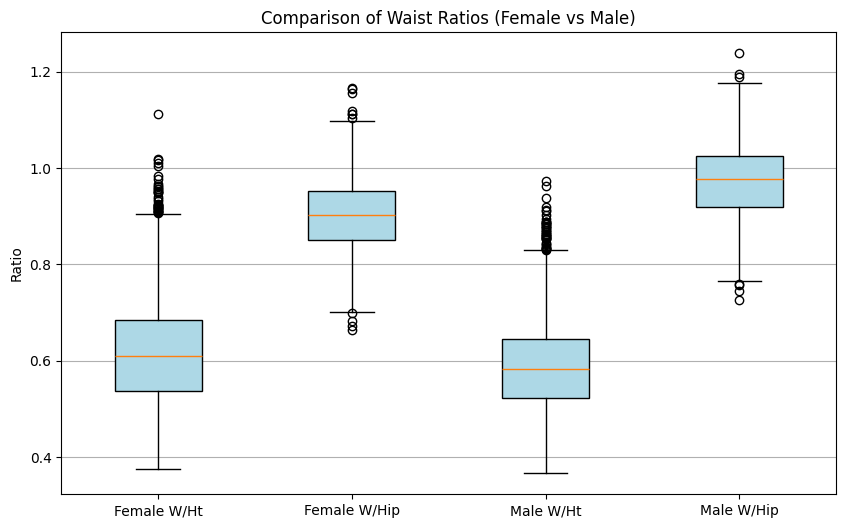

In [ ]:



female_ratios = [female[:, -2], female[:, -1]]
male_ratios = [male[:, -2], male[:, -1]]

all_ratios = female_ratios + male_ratios
labels = ['Female W/Ht', 'Female W/Hip', 'Male W/Ht', 'Male W/Hip']

plt.figure(figsize=(10, 6))
plt.boxplot(all_ratios, labels=labels, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Comparison of Waist Ratios (Female vs Male)')
plt.ylabel('Ratio')
plt.grid(axis='y')
plt.show()


What the box plot shows:

Distribution of Ratios: The boxes themselves represent the interquartile range (middle 50%) of the data for each ratio and gender. The line inside the box is the median.

Comparison between Groups: By looking at the position and spread of the boxes, you can compare the typical values and variability of these ratios between males and females. For example, if the male 'W/Ht' box is higher than the female 'W/Ht' box, it suggests males tend to have higher waist-to-height ratios.

Outliers: Points plotted outside the "whiskers" of the box plot are potential outliers, indicating individuals with unusually high or low ratios compared to the rest of their group.

In short, the code visualizes the differences in body proportions between males and females using waist-to-height and waist-to-hip ratios

#Advantages and disadvantages of BMI, waist-to-height ratio, and waist-to-hip ratio
BMI:

Advantages-
- Simple and quick to calculate
- Globally recognized
- Provides population-level health trends

Disadvantages-
- Fails to differentiate between fat and muscle
- Ignores fat distribution
- Less reliable for elderly, children, and athletic populations

WAIST-TO-HEIGHT ratio:

Advantages-
- Better predictor of abdominal fat
- Consistent across demographics
- Height-adjusted
- Useful for early detection of health risks

Disadvantages-
- Less widely used
- Requires precise waist measurements
- Limited usefulness for underweight individuals

WAIST-TO-HIP ratio:

Advantages-
- Indicates fat distribution
- Strong correlation with chronic disease risks
- Not affected by height

Disadvantages-
- Prone to measurement inconsistencies
- Less precise for populations with low fat levels
- Cultural and gender interpretation differences


## Individuals with Lowest and Highest BMI
The table below lists body measurements for individuals with the lowest and highest BMI, standardized for comparability.


In [ ]:

sorted_indices = np.argsort(female[:, 7])
lowest_bmi = zfemale[sorted_indices[:5]]
highest_bmi = zfemale[sorted_indices[-5:]]

print("Lowest BMI individuals (Standardized):", lowest_bmi)
print("Highest BMI individuals (Standardized):", highest_bmi)


Lowest BMI individuals (Standardized): [[-2.08003158 -1.2231363  -1.54802354 -1.16919522 -2.19502107 -2.0407913
  -1.94235132 -2.05048313 -2.05048313 -2.05048557 -2.05048557 -2.05048557]
 [-1.88040258 -0.18931555 -1.71855601  0.38642468 -2.44465123 -1.85513894
  -2.0573238  -1.99511616 -1.99511616 -1.99511861 -1.99511861 -1.99511861]
 [-1.536855    1.80751629  0.62626544  0.57309907 -2.26634397 -1.67588838
  -1.70665772 -1.97111727 -1.97111727 -1.97111972 -1.97111972 -1.97111972]
 [-1.8432623  -0.26012519 -0.2263969   0.51087428 -2.30200542 -2.25205089
  -1.85612196 -1.94200591 -1.94200591 -1.94200836 -1.94200836 -1.94200836]
 [-1.61113556  0.88699097 -0.09849755  0.47976188 -2.21285179 -1.82953171
  -1.71240635 -1.89342001 -1.89342001 -1.89342246 -1.89342246 -1.89342246]]
Highest BMI individuals (Standardized): [[ 4.24774338  0.29219     1.86262584 -0.98252084  2.36964474  4.10494214
   3.81777018  4.39701236  4.39701236  4.39700984  4.39700984  4.39700984]
 [ 4.45665745  0.50461892  

We can interpret the individuals with the most extreme BMI values in the standardized data and presents their standardized body measurements. By examining these values, you can gain insights into the characteristics of individuals at both ends of the BMI spectrum within this specific dataset